# ***Exercise 1***

**Part 1**

In [ ]:
import pandas_datareader as web
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Set the API parameters
end = "2023-01-01" # period start date
start = "2020-01-01" # period end date
symbol =  "AAPL"# asset symbol - For more symbols check yahoo.finance.com
df1 = yf.download(symbol, start=start, end=end)

# Send the request to the yahoo finance api endpoint
print("\n")
print(df1.head())
print("\n")

[*********************100%***********************]  1 of 1 completed



                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  74.059998  75.150002  73.797501  75.087502  72.876106  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.167603  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  72.742668  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.400543  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  73.565186  132079200




Open : The stock price at the beggining of the day

High : The highest price of the day

Low  : The lowest price of the day

Close: The price at the end of the day


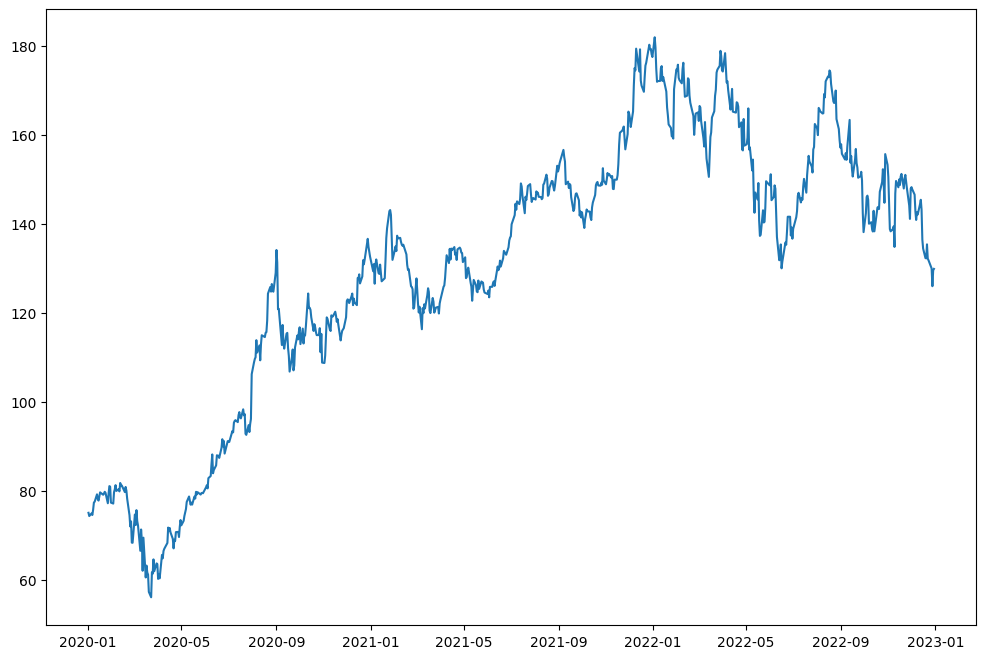

In [ ]:
#Plot the closing prices
fig, ax1 = plt.subplots(figsize=(12, 8))
plt.plot(df1.index, df1.Close)
plt.show()

**Part** 2

In [87]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the website
url = "https://www.worldometers.info/world-population/population-by-country/"

# Send a request to fetch the page content
response = requests.get(url)

# Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(response.content, 'lxml')

# Find the table on the page
table = soup.find('table')

# Create empty lists to store data
countries = []
populations = []

# Loop through the rows in the table and extract data
for row in table.find_all('tr')[1:]:
    columns = row.find_all('td')
    country = columns[1].text.strip()
    population = columns[2].text.strip()


    countries.append(country)
    populations.append(population)

# Create a pandas DataFrame
df2 = pd.DataFrame({
    'Country': countries,
    'Population': populations
})

# Display the first 5 rows
print(df2.head())
print("\n")

print("Number of countries: " + str(df2['Country'].nunique()))

df2['Population'] = df2['Population'].str.replace(',', '').astype(int)

print("\n")
print(df2.sort_values(by='Population', ascending=False).head())

         Country     Population
0          India  1,450,935,791
1          China  1,419,321,278
2  United States    345,426,571
3      Indonesia    283,487,931
4       Pakistan    251,269,164


Number of countries: 234


         Country  Population
0          India  1450935791
1          China  1419321278
2  United States   345426571
3      Indonesia   283487931
4       Pakistan   251269164


**Part** 3

# Question 1

In [88]:
# Reading a CSV file
csv_file_path = '/content/bike_sales_100k.csv'
df_csv = pd.read_csv(csv_file_path)
print("CSV File Data:")
print(df_csv.head(1000))

print("\n")

# Reading an Excel file
excel_file_path = '/content/FSI-2023-DOWNLOAD.xlsx'
df_excel = pd.read_excel(excel_file_path, sheet_name=0)
print("Excel File Data:")
print(df_excel.head())

FileNotFoundError: [Errno 2] No such file or directory: '/content/bike_sales_100k.csv'

Question 2

In [ ]:
filtered_df = df_csv[df_csv['Quantity'] > 3]
print(filtered_df)

In [ ]:
filtered_df = df_excel[df_excel['Total'] > 100]
print(filtered_df)

**Part** 4

Cleaning data of Countries' Net population growth

In [86]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.worldometers.info/world-population/population-by-country/"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'lxml')
table = soup.find('table')

Net_changes = []
countries = []

for row in table.find_all('tr')[1:11]:
    columns = row.find_all('td')
    Net_change = columns[4].text.strip()
    country = columns[1].text.strip()
    Net_changes.append(Net_change)
    countries.append(country)

    df3 = pd.DataFrame({
    'Country': countries,
    'Net_change': Net_changes
})

df3['Net_change'] = df3['Net_change'].str.replace(',', '').astype(int)
df3.sort_values(by='Net_change', ascending=True, inplace=True)
print(df3.head(10))


         Country  Net_change
1          China    -3263655
8         Russia     -620077
6         Brazil      857844
2  United States     1949236
7     Bangladesh     2095374
3      Indonesia     2297864
9       Ethiopia     3368075
4       Pakistan     3764669
5        Nigeria     4796533
0          India    12866195


Cleaning data of Apple stock price

In [89]:
import yfinance as yf

end = "2024-09-30" # period start date
start = "2024-01-01" # period end date
symbol =  "AAPL"# asset symbol - For more symbols check yahoo.finance.com
df4 = yf.download(symbol, start=start, end=end)

df4 = df4[['High']]

print("\n")

[*********************100%***********************]  1 of 1 completed

In [ ]:
import seaborn as sns

# Create a shared figure for both plots
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot the stock data (e.g., Apple's High prices) on the primary y-axis (left side)
ax1.plot(df4.index, df4.High, color='blue', label='Stock Price')
ax1.set_xlabel('Date')  # Common x-axis for both plots
ax1.set_ylabel('Stock Price (High)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Adjust the x-axis limits of ax1 to make room for the bar plot if necessary
ax1.set_xlim([df4.index.min(), df4.index.max()])

# Create a secondary y-axis (right side) for the population growth bar plot
ax2 = ax1.twinx()

# Create an inset axis on the right side of the plot to display bars
ax_inset = fig.add_axes([0.7, 0.15, 0.25, 0.7])  # [left, bottom, width, height]
sns.barplot(x='Country', y='Net_change', data=df3.head(10), ax=ax_inset, alpha=0.6, palette='tab10')

# Customize the second y-axis
ax2.set_ylabel('Net Population Change', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Customize the bar plot (rotation, labels, spines, etc.)
ax_inset.set_title(r"Net Change", loc="center")
ax_inset.set_ylabel("Net Change")  # Set y-axis label for the inset
ax_inset.set_xlabel("")  # Remove x-axis label for the inset
ax_inset.set_xticklabels(df3['Country'].head(10), rotation=45)  # Rotate x-axis labels for inset

# Customize plot spines for the inset plot (optional)
for key, spine in ax_inset.spines.items():
    spine.set_visible(False)  # Remove plot spines on inset axis

# Display the combined plot
fig.suptitle("Apple Stock Data and Population Growth", y=1.01)
plt.show()



# ***Exercise 2***

**Part** **1**

In [ ]:
pip install pandas eurostat requests

Greece's GDP in the last year:
0    2.0
Name: 2023, dtype: float64




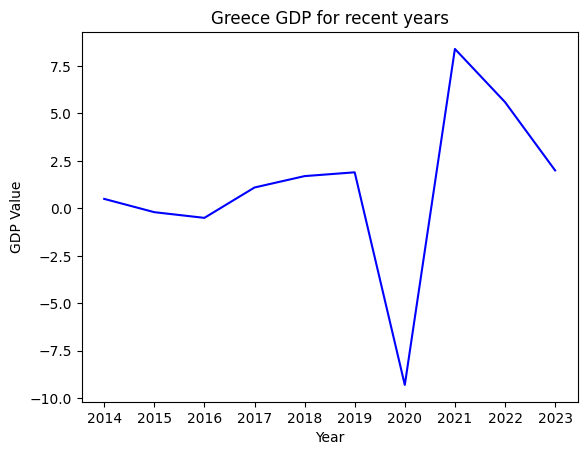

In [112]:
import eurostat
import datetime
import matplotlib.pyplot as plt


current_year = datetime.datetime.now().year

my_filter_pars = {
    'time': str(current_year - 1),
    'geo': ['EL'],
    'unit': ['CLV_PCH_PRE']
}
data = eurostat.get_data_df('tec00115', filter_pars=my_filter_pars)

print("Greece's GDP in the last year:")
print(data[str(current_year - 1)])
print('\n')


# Get the current year
current_year = datetime.datetime.now().year

# Create the filter for the last five years
my_filter_pars = {
    'endPeriod': current_year,
    'startPeriod': current_year - 10,
    'geo': ['EL'],
    'unit': ['CLV_PCH_PRE']
}

latest_gdp_greece = eurostat.get_data_df('tec00115', filter_pars=my_filter_pars)

latest_gdp_greece_years5 = latest_gdp_greece.T

plt.plot(latest_gdp_greece_years5.index[4:], latest_gdp_greece_years5.values[4:], color='blue')

plt.xlabel("Year")
plt.ylabel("GDP Value")
plt.title("Greece GDP for recent years")
plt.show()


Part **2**

Unemployment rate of january 2023:
0    11.0
Name: 2023-01, dtype: float64




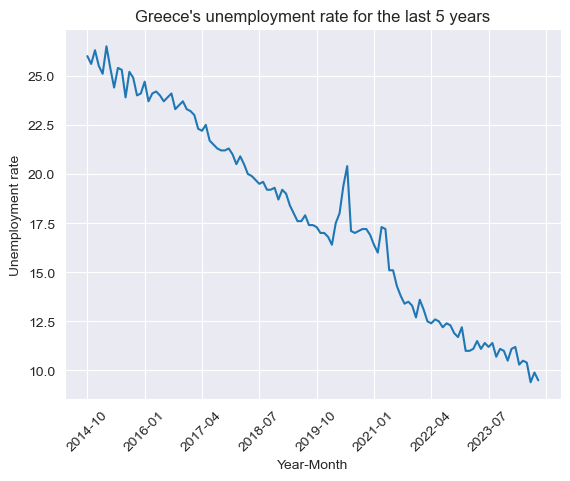

In [4]:
import eurostat
import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

current_month = datetime.datetime.now().month
current_year = datetime.datetime.now().year

date_1 = str(current_year) + '-' + '0' + str(current_month - 2)
date_2 = str(current_year - 10) + '-' + str(current_month)

my_filter_pars_1 = {
    'time': '2023-01',
    'geo': ['EL'],
    'age': ['total'],
    'unit': ['PC_ACT'],
    'sex':['T'],
    's_adj':['SA'],
}

unemployment_data_2023_01 = eurostat.get_data_df('une_rt_m', filter_pars=my_filter_pars_1)

print("Unemployment rate of january 2023:")
print(unemployment_data_2023_01['2023-01'])
print("\n")

my_filter_pars_2 = {
    'endPeriod': date_1,
    'startPeriod': date_2,
    'geo': ['EL'],
    'age': ['total'],
    'unit': ['PC_ACT'],
    'sex':['T'],
    's_adj':['SA'],
}

unemployment_data_last_5 = eurostat.get_data_df('une_rt_m', filter_pars=my_filter_pars_2)

unemployment_data_last_5 = unemployment_data_last_5.T

plt.plot(unemployment_data_last_5.index[6:], unemployment_data_last_5.values[6:])
plt.xlabel("Year-Month")
plt.ylabel("Unemployment rate")

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))  #These two lines help to better represent the x-axis

plt.title("Greece's unemployment rate for the last 5 years")
plt.show()

**Part** **3**

Greece's population in 2023:
0    10413982.0
Name: 2023, dtype: float64




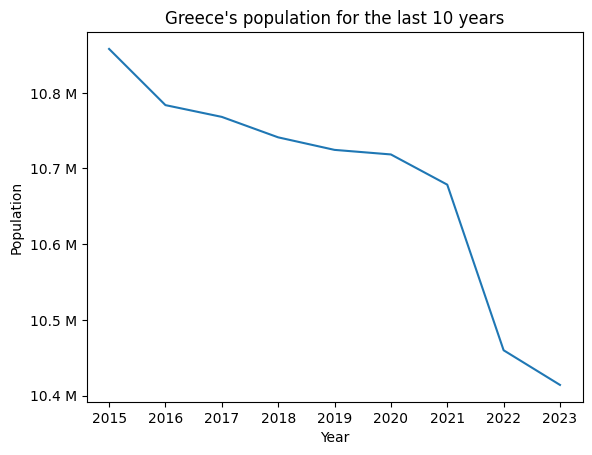

In [110]:
import eurostat
import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import EngFormatter

current_year = datetime.datetime.now().year

my_filter_pars = {
    'geo': ['EL'],
    'age': ['total'],
    'sex':['T'],
    'time': str(current_year - 1)
}

population_data_2023 = eurostat.get_data_df('demo_pjan', filter_pars=my_filter_pars)

print("Greece's population in 2023:")
print(population_data_2023[str(current_year - 1)])
print("\n")

my_filter_pars = {
    'endPeriod': str(current_year),
    'startPeriod': str(current_year - 10),
    'geo': ['EL'],
    'age': ['total'],
    'sex':['T'],
}

population_data_10years = eurostat.get_data_df('demo_pjan', filter_pars=my_filter_pars)
population_data_10years = population_data_10years.T

fig, ax1 = plt.subplots()

ax1.plot(population_data_10years.index[6:], population_data_10years.values[6:])
plt.xlabel("Year")
plt.ylabel("Population")

ax1.yaxis.set_major_formatter(EngFormatter(unit=''))

plt.title("Greece's population for the last 10 years")
plt.show()

**Part** **4**

                         0
geo\TIME_PERIOD         EL
2014             26.666667
2015                24.975
2016                 23.85
2017             21.866667
2018                 19.75
2019             17.816667
2020             17.583333
2021             14.841667
2022                 12.45
2023             11.083333
2024               10.2875
                   0
geo\TIME_PERIOD   EL
2014             0.5
2015            -0.2
2016            -0.5
2017             1.1
2018             1.7
2019             1.9
2020            -9.3
2021             8.4
2022             5.6
2023             2.0
                          0
geo\TIME_PERIOD          EL
2014             10926807.0
2015             10858018.0
2016             10783748.0
2017             10768193.0
2018             10741165.0
2019             10724599.0
2020             10718565.0
2021             10678632.0
2022             10459782.0
2023             10413982.0
                          0
geo\TIME_PERIOD          EL
2014_

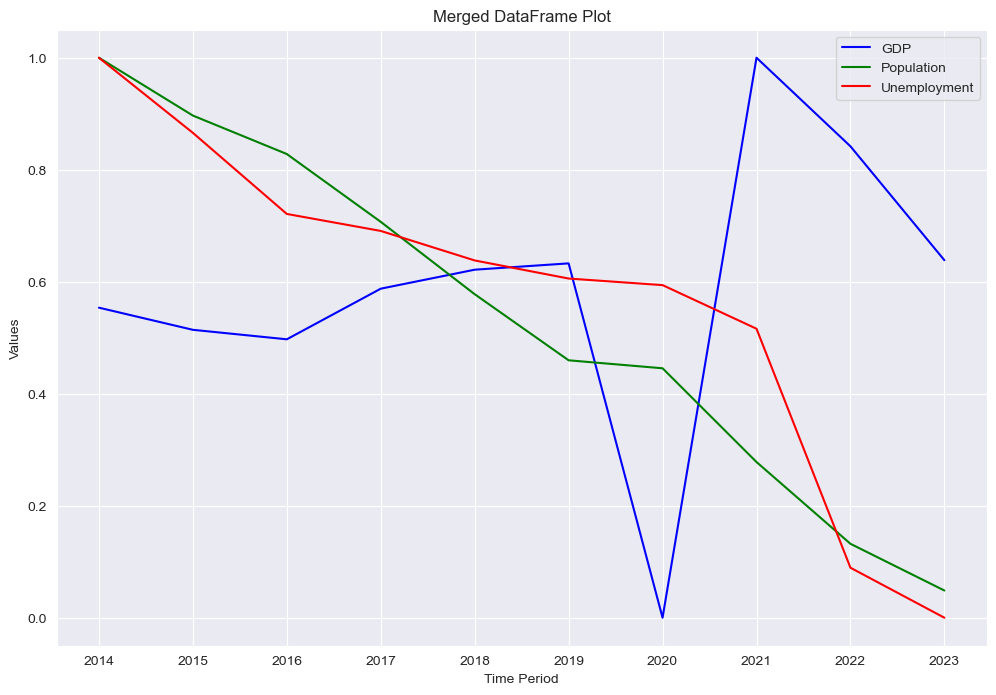

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import eurostat
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import EngFormatter

# Get the current year
current_year = datetime.datetime.now().year
current_month = datetime.datetime.now().month
date_1 = str(current_year) + '-' + '0' + str(current_month - 2)
date_2 = str(current_year - 10) + '-' + str(current_month)
# Create the filter for the last five years
my_filter_pars = {
    'endPeriod': current_year,
    'startPeriod': current_year - 10,
    'geo': ['EL'],
    'unit': ['CLV_PCH_PRE']
}

my_filter_pars_2 = {
    'endPeriod': current_year,
    'startPeriod': current_year - 10,
    'geo': ['EL'],
    'age': ['total'],
    'unit': ['PC_ACT'],
    'sex':['T'],
    's_adj':['SA'],
}

my_filter_pars3 = {
    'endPeriod': str(current_year),
    'startPeriod': str(current_year - 10),
    'geo': ['EL'],
    'age': ['total'],
    'sex':['T'],
}

latest_gdp_greece = eurostat.get_data_df('tec00115', filter_pars=my_filter_pars)
unemployment_data_last_5 = eurostat.get_data_df('une_rt_m', filter_pars=my_filter_pars_2)
population_data_10years = eurostat.get_data_df('demo_pjan', filter_pars=my_filter_pars3)

# Normalize data
scaler = MinMaxScaler()
latest_gdp_greece = latest_gdp_greece.T.iloc[3:]
unemployment_data_last_5 = unemployment_data_last_5.T.iloc[6:]
population_data_10years = population_data_10years.T.iloc[4:]

 # Convert the index to datetime
unemployment_data_last_5.index = pd.to_datetime(unemployment_data_last_5.index, format='%Y-%m')

# Group by year and calculate the mean
unemployment_data_yearly_avg = unemployment_data_last_5.resample('YE').mean()

# Convert the index back to year format
unemployment_data_yearly_avg.index = unemployment_data_yearly_avg.index.year
# print(unemployment_data_yearly_avg)
unemployment_data_yearly_avg = pd.concat([latest_gdp_greece.iloc[0:1], unemployment_data_yearly_avg])
print(unemployment_data_yearly_avg)

print(latest_gdp_greece)
# print(unemployment_data_last_5)
print(population_data_10years)
merged_greece_df = pd.merge(latest_gdp_greece.T, population_data_10years.T, on="geo\\TIME_PERIOD")
merged_greece_df = pd.merge(merged_greece_df, unemployment_data_yearly_avg.T, on='geo\\TIME_PERIOD').T
print(merged_greece_df)

latest_gdp_greece_normalized = pd.DataFrame(scaler.fit_transform(latest_gdp_greece.iloc[1:]), index=latest_gdp_greece.index[1:], columns=latest_gdp_greece.columns)
unemployment_data_last_5_normalized = pd.DataFrame(scaler.fit_transform(unemployment_data_yearly_avg.iloc[1:]), index=unemployment_data_yearly_avg.index[1:], columns=unemployment_data_yearly_avg.columns)
population_data_10years_normalized = pd.DataFrame(scaler.fit_transform(population_data_10years.iloc[1:]), index=population_data_10years.index[1:], columns=population_data_10years.columns)
print ("YEARLY VALUES ARE ")
print(latest_gdp_greece_normalized)
print(population_data_10years_normalized)

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 8))

unemployment_data_last_5_normalized = unemployment_data_last_5_normalized.drop(unemployment_data_last_5_normalized.index[-1])
print(unemployment_data_last_5_normalized)
unemployment_data_last_5_normalized.index = latest_gdp_greece_normalized.index
print(unemployment_data_last_5_normalized)

# Plot each column of interest on the same axis
ax.plot(latest_gdp_greece_normalized.index, latest_gdp_greece_normalized, label='GDP', color='blue')
ax.plot(unemployment_data_last_5_normalized.index, unemployment_data_last_5_normalized, label='Population', color='green')
ax.plot(population_data_10years_normalized.index, population_data_10years_normalized, label='Unemployment', color='red')

# Customize the plot
ax.set_xlabel('Time Period')
ax.set_ylabel('Values')
ax.set_title('Merged DataFrame Plot')
ax.legend()

# Display the plot
plt.show()
